In [23]:
import os
import imageio
import numpy as np
import matplotlib.pyplot as plt
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_dice_loss
from segmentation_models.metrics import dice_score

from sklearn.model_selection import train_test_split

In [7]:
IMAGES_PATH = '../input/images/'
MASKS_PATH = '../input/masks/'
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

In [18]:
images = list(os.walk(IMAGES_PATH))[0][2][:-1]
X = np.array([imageio.imread(IMAGES_PATH + im) for im in images])
X.shape

(2400, 224, 224, 3)

In [16]:
masks = list(os.walk(MASKS_PATH))[0][2][:-1]
y = np.array([imageio.imread(MASKS_PATH + mask) for mask in masks])
y.shape

(2400, 224, 224)

In [19]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [20]:
model = Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=bce_dice_loss, metrics=[dice_score])

model.fit(
    x=x_train,
    y=y_train,
    batch_size=1,
    epochs=5,
    validation_data=(x_val, y_val),
)

In [39]:
prediction = model.predict(x_val[:2])
prediction.shape

(2, 224, 224, 1)

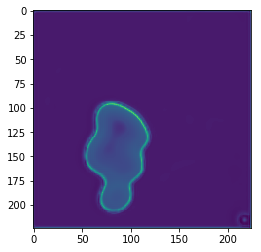

In [35]:
plt.imshow(prediction[0,:,:,0])


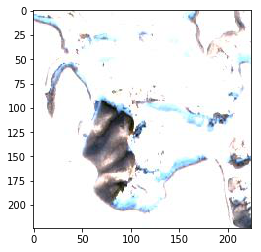

In [36]:
plt.imshow(x_val[0])

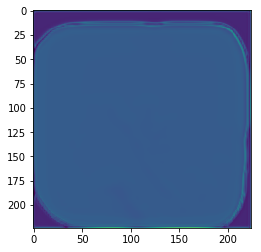

In [37]:
plt.imshow(prediction[1,:,:,0])

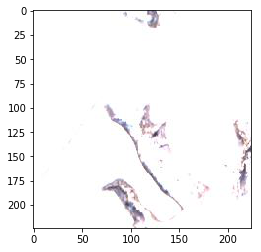

In [38]:
plt.imshow(x_val[1])